# Regularization

In [50]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import os

import model
import data_loader
import loss
import tester
import utils

In [2]:
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [3]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


## Demo

In [4]:
net = model.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_dlinknet34_re_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.51,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_dlinknet34_re_epoch20.pth is ready 
(threshold = 0.51, 784 pairs in test dataset)


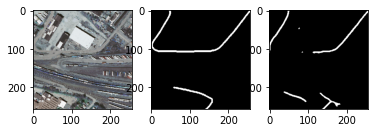

In [42]:
tt.test_idx(16)

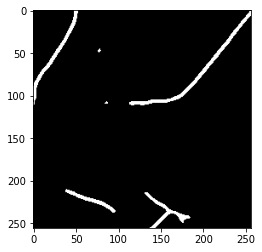

In [43]:
tmp = utils.change_tensor_to_plot(tt.pred)
plt.imshow(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


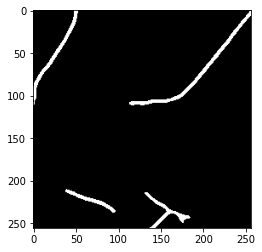

In [44]:
img = utils.get_improved_result(tmp, threshold = 200)
plt.imshow(img)

## Save Result

In [53]:
# root_path = 'D://Data/massachusetts-roads-dataset/'
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
improved_path = '/home/renyan/road-extraction/predict_result/test_result/'
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [61]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')
test_dataset.label_list = [improved_path + file_name for file_name in list(os.walk(improved_path))[1][2]]

test dataset set: 784 pairs
